##     A  MODEL FOR PREDICTION OF DRUG RESISTANT TUBERCULOSIS USING 
##     THE GAUSSIAN NAIVE BAYES CLASSIFIER

###                                     BY

##                  ABDULLAHI HALLIRU


In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [51]:
import warnings
warnings.filterwarnings('ignore')

##  Load the data

In [52]:
df = pd.read_csv("dr_dataset.csv")
df.head(100)

,Gender,Age,Contact DR,Smoking,Alcohol,Cavitary pulmonary,Diabetes,Nutritional,TBoutside,Class
0,Male,>= 45 years,Yes,Yes,No,Yes,No,Underweight,No,DR
1,Female,>= 45 years,Yes,Yes,No,Yes,No,Underweight,No,DR
2,Female,>= 45 years,No,No,No,Yes,No,Underweight,No,DR
3,Male,>= 45 years,Yes,Yes,No,Yes,No,Normal,No,DR
4,Female,< 45 years,No,No,No,Yes,No,Underweight,No,DR
...,...,...,...,...,...,...,...,...,...,...
95,Female,< 45 years,No,No,No,No,No,Normal,No,DS
96,Male,< 45 years,No,No,No,No,No,Normal,No,DS
97,Female,< 45 years,No,No,No,No,No,Normal,No,DS
98,Female,< 45 years,Yes,No,No,No,No,Normal,No,DS


In [53]:
df.Class.value_counts()

DS    219
DR     73
Name: Class, dtype: int64

In [54]:
df.dtypes

Gender                object
Age                   object
Contact DR            object
Smoking               object
Alcohol               object
Cavitary pulmonary    object
Diabetes              object
Nutritional           object
TBoutside             object
Class                 object
dtype: object

In [55]:
df1 = df.copy()

In [56]:
df1.head()

,Gender,Age,Contact DR,Smoking,Alcohol,Cavitary pulmonary,Diabetes,Nutritional,TBoutside,Class
0,Male,>= 45 years,Yes,Yes,No,Yes,No,Underweight,No,DR
1,Female,>= 45 years,Yes,Yes,No,Yes,No,Underweight,No,DR
2,Female,>= 45 years,No,No,No,Yes,No,Underweight,No,DR
3,Male,>= 45 years,Yes,Yes,No,Yes,No,Normal,No,DR
4,Female,< 45 years,No,No,No,Yes,No,Underweight,No,DR


## Data Visualization

In [57]:
def visualize(feature):
        dr = df1[df1.Class=='DR']
        dr = dr[feature]
        ds = df1[df1.Class=='DS']
        ds = ds[feature]

        plt.xlabel(f"{feature}")
        plt.ylabel("Number Of Cases")
        plt.title("Multi-Drug Resistant Tuberculosis Visualization")


        plt.hist([dr, ds], rwidth=0.95, color=['green','red'],label=['DR','DS'])
        plt.legend()

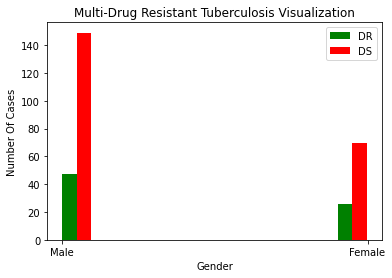

In [58]:
visualize('Gender')

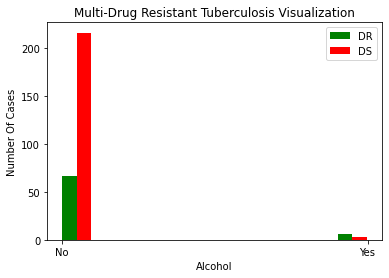

In [59]:
visualize('Alcohol')

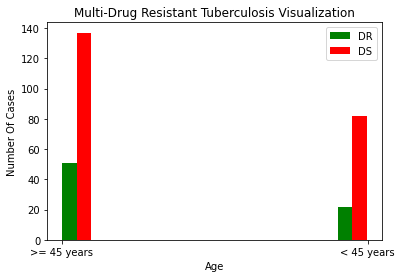

In [60]:
visualize('Age')

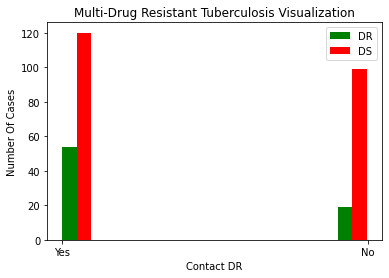

In [61]:
visualize('Contact DR')

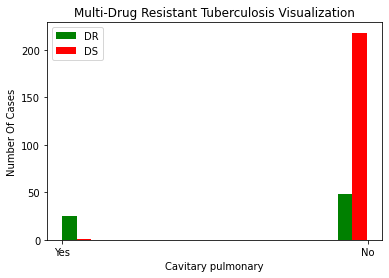

In [62]:
visualize('Cavitary pulmonary')

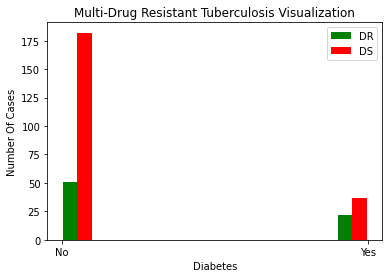

In [63]:
visualize('Diabetes')

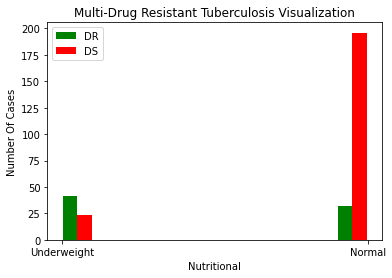

In [64]:
visualize('Nutritional')

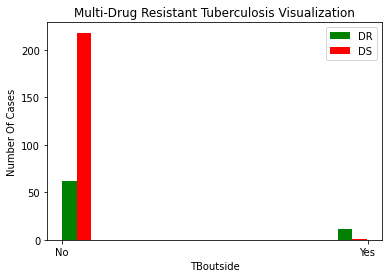

In [65]:
visualize('TBoutside')

## Let's print unique values in object columns to see data values

In [66]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [67]:
print_unique_col_values(df1)

Gender: ['Male' 'Female']
Age: ['>= 45 years' '< 45 years']
Contact DR: ['Yes' 'No']
Smoking: ['Yes' 'No']
Alcohol: ['No' 'Yes']
Cavitary pulmonary: ['Yes' 'No']
Diabetes: ['No' 'Yes']
Nutritional: ['Underweight' 'Normal']
TBoutside: ['No' 'Yes']
Class: ['DR' 'DS']


## Convert Yes and No column values to 1 or 0

In [70]:
yes_no_columns = ['Contact DR','Smoking','Alcohol','Cavitary pulmonary','Diabetes','TBoutside','Class']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [71]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

Gender: ['Male' 'Female']
Age: ['>= 45 years' '< 45 years']
Contact DR: [1 0]
Smoking: [1 0]
Alcohol: [0 1]
Cavitary pulmonary: [1 0]
Diabetes: [0 1]
Nutritional: ['Underweight' 'Normal']
TBoutside: [0 1]
Class: ['DR' 'DS']


In [72]:
df1['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [73]:
df1.Gender.unique()

array([0, 1], dtype=int64)

In [75]:
df1['Class'].replace({'DR':1,'DS':0},inplace=True)

In [76]:
df1.Class.unique()

array([1, 0], dtype=int64)

In [78]:
df1.sample(5)

,Gender,Age,Contact DR,Smoking,Alcohol,Cavitary pulmonary,Diabetes,Nutritional,TBoutside,Class
154,0,>= 45 years,1,1,0,0,1,Normal,0,0
281,1,< 45 years,1,0,0,0,0,Normal,0,0
275,0,< 45 years,1,0,0,0,1,Normal,0,0
100,0,< 45 years,0,1,0,0,0,Normal,0,0
141,0,>= 45 years,0,1,0,0,0,Normal,0,0


**One hot encoding for categorical columns**

In [79]:
df2 = pd.get_dummies(data=df1, columns=['Age','Nutritional'])
df2.columns

Index(['Gender', 'Contact DR', 'Smoking', 'Alcohol', 'Cavitary pulmonary',
       'Diabetes', 'TBoutside', 'Class', 'Age_< 45 years', 'Age_>= 45 years',
       'Nutritional_Normal', 'Nutritional_Underweight'],
      dtype='object')

In [80]:
df2.sample(5)

,Gender,Contact DR,Smoking,Alcohol,Cavitary pulmonary,Diabetes,TBoutside,Class,Age_< 45 years,Age_>= 45 years,Nutritional_Normal,Nutritional_Underweight
235,0,1,0,0,0,0,0,0,0,1,1,0
101,0,0,0,0,0,0,0,0,1,0,1,0
30,0,1,1,0,0,1,0,1,0,1,0,1
94,1,1,0,0,0,0,0,0,0,1,1,0
275,0,1,0,0,0,1,0,0,1,0,1,0


In [81]:
df2.dtypes

Gender                     int64
Contact DR                 int64
Smoking                    int64
Alcohol                    int64
Cavitary pulmonary         int64
Diabetes                   int64
TBoutside                  int64
Class                      int64
Age_< 45 years             uint8
Age_>= 45 years            uint8
Nutritional_Normal         uint8
Nutritional_Underweight    uint8
dtype: object

## Train test split

In [82]:
X = df2.drop('Class',axis='columns')
y = df2['Class']

## Mitigating Skewdness of Data Using SMOTE

In [85]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()


1    219
0    219
Name: Class, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [87]:
# Number of classes in training Data
y_train.value_counts()

0    175
1    175
Name: Class, dtype: int64

In [88]:
# Number of classes in test Data
y_test.value_counts()

1    44
0    44
Name: Class, dtype: int64

## Now we are going to train our model using the Gaussian Naive Bayes model

In [89]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [90]:
model.fit(X_train, y_train)

GaussianNB()

In [91]:
model.score(X_test,y_test)

0.7159090909090909

In [92]:
X_test[:10]

,Gender,Contact DR,Smoking,Alcohol,Cavitary pulmonary,Diabetes,TBoutside,Age_< 45 years,Age_>= 45 years,Nutritional_Normal,Nutritional_Underweight
382,0,1,1,0,0,0,0,0,1,0,1
228,1,1,0,0,0,0,0,1,0,1,0
339,1,1,0,0,0,1,0,0,1,1,0
152,1,1,0,0,0,0,0,1,0,1,0
90,1,1,0,0,0,0,0,0,1,1,0
232,0,0,0,0,0,0,0,0,1,1,0
92,1,0,0,0,0,1,0,0,1,1,0
110,0,1,0,0,0,0,0,1,0,1,0
117,0,0,0,0,0,0,0,0,1,1,0
261,0,1,1,0,0,1,0,0,1,1,0


In [103]:
truth=y_test
truth

382    1
228    0
339    1
152    0
90     0
      ..
437    1
272    0
303    1
36     1
366    1
Name: Class, Length: 88, dtype: int64

In [105]:
prediction = model.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

## Performance Measure of Classifier

### Confusion Matrix

In [109]:
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns

In [110]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

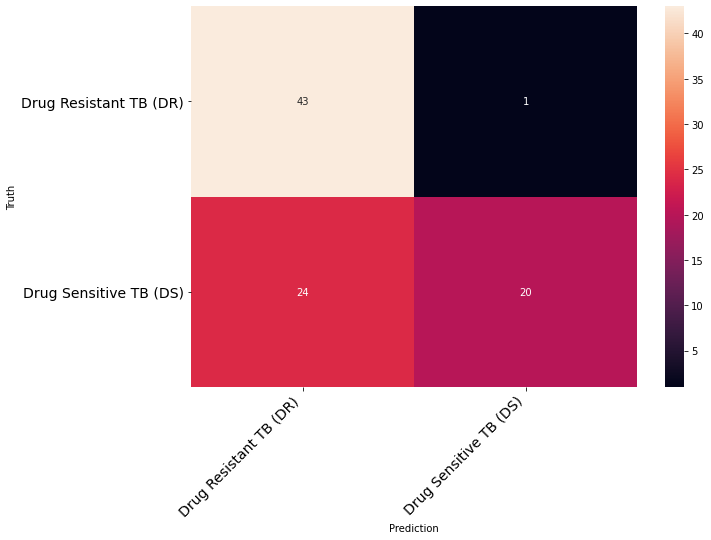

In [112]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,["Drug Resistant TB (DR)","Drug Sensitive TB (DS)"])

In [114]:
def convert_binary_category_to_string(category):
    new_category = []
    for item in category:
        if item == 1:
            new_category.append('Drug Resistant TB (DR)')
        else:
            new_category.append('Drug Sensitive TB (DS)')
    return new_category

In [116]:
new_truth = convert_binary_category_to_string(truth)
new_prediction = convert_binary_category_to_string(prediction)

In [118]:
new_truth[:5]

['Drug Resistant TB (DR)',
 'Drug Sensitive TB (DS)',
 'Drug Resistant TB (DR)',
 'Drug Sensitive TB (DS)',
 'Drug Sensitive TB (DS)']

In [119]:
new_prediction[:5]

['Drug Sensitive TB (DS)',
 'Drug Sensitive TB (DS)',
 'Drug Sensitive TB (DS)',
 'Drug Sensitive TB (DS)',
 'Drug Sensitive TB (DS)']

In [120]:
print(classification_report(new_truth, new_prediction))

                        precision    recall  f1-score   support

Drug Resistant TB (DR)       0.95      0.45      0.62        44
Drug Sensitive TB (DS)       0.64      0.98      0.77        44

              accuracy                           0.72        88
             macro avg       0.80      0.72      0.70        88
          weighted avg       0.80      0.72      0.70        88



## Receiver Operating Characteristics (ROC) Curve and Area Under Curve(AUC)

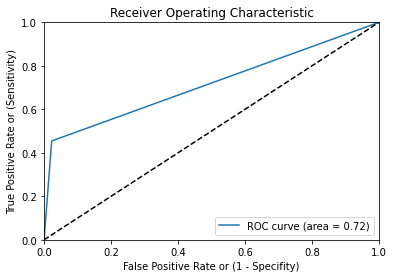

In [133]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, threshold= roc_curve(truth,prediction)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")